# Problem 2

In [21]:
import numpy as np
import matplotlib.pyplot as plt

The function below defines the hill-curve of a 2-repressor NOR gate, using dimensionless versions of all species to simplify interpretation. It accepts 2 inputs, r1 and r2, which are the concentrations of 2 different repressors; as well as the inputs n1 and n2, the Hill coefficients for each repressor (which default to 20, a biologically implausible value, exaggerated to illustrate the logic gate behavior more clearly). The output of the function is the concentration of the protein whose expression is regulated by repressors r1 and r2. Note you do not need to modify the code below, it is provided to you as you have already derived this equation in class.

In [22]:
### DO NOT MODIFY THIS CELL ###

def nor_gate(r1, r2, n1=20, n2=20,g_max=1):
    return 1/(1+r1**n1)/(1+r2**n2)*g_max

Visualize the truth table of this NOR-gate by running the cell below.

In [23]:
### YOU MAY MODIFY THIS CELL BUT WILL NOT BE GRADED ###

# Note: here we're treating this gate as digital by defining a concentration threshold
# for what constitutes a 1 or 0, ON or OFF, HIGH or LOW, etc. Feel free to change these 
# threshold values to see how they affect the output of the gate. Also feel free to play 
# with the value of n1 and n2 to see how they affect the digital behavior of the gate.

OFF_CONCENTRATION = 0.1
ON_CONCENTRATION = 10

n = 2

# generate truth table
print(f'R1     | R2     | OUT  ')
print(f'-----------------------')
for r1 in [OFF_CONCENTRATION, ON_CONCENTRATION]:
    for r2 in [OFF_CONCENTRATION, ON_CONCENTRATION]:
        print(f'{r1:<5.2f}  | {r2:<5.2f}  | {nor_gate(r1, r2,n1=n,n2=n,g_max=ON_CONCENTRATION):.2f}')

R1     | R2     | OUT  
-----------------------
0.10   | 0.10   | 9.80
0.10   | 10.00  | 0.10
10.00  | 0.10   | 0.10
10.00  | 10.00  | 0.00


Run the cell below to visualize the output of the nor gate for varying concentrations of the 2 input repressors. Try modifying the value of n to see how the contour changes with increased sensitivity to repressor binding (not graded).

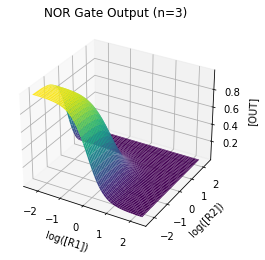

In [24]:
### YOU MAY MODIFY THIS CELL BUT WILL NOT BE GRADED ###

n = 3

# plot nor gate output in 3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.logspace(-1, 1, 100)
X, Y = np.meshgrid(x, x)
Z = nor_gate(X, Y, n, n)
# plot surface as wireframe
ax.plot_surface(np.log(X), np.log(Y), Z, cmap='viridis')
# label x and y axes
ax.set_xlabel('log([R1])')
ax.set_ylabel('log([R2])')
# label z axis
ax.set_zlabel('[OUT]')
# set title
ax.set_title(f'NOR Gate Output (n={n})')
plt.show()

## 2.1

Now it's finally time to write your own code. Implement XOR logic using only NOR-gate building blocks. You should be able to achieve this with 5 NOR gates. See the HW PDF for more details/guidance.

working diagram: https://upload.wikimedia.org/wikipedia/commons/5/5e/XOR_from_NOR_2.svg

nonfunctional diagram: https://upload.wikimedia.org/wikipedia/commons/e/e3/XOR_from_NOR.svg

In [49]:

### MODIFY THIS CELL ###

# C = A'B + AB' (XOR logic definition where ' indicates inverted signal)

#   Although there are multiple ways to create an XOR gate using five
#   NOR gates, only one of them actually yields the graphs that are 
#   copies of what the TAs made, which is somewhat confusing.
#   

#   The logic that this is derived from can be found on Wikipedia
#   or on YouTube at "https://www.youtube.com/watch?v=Lnt43nbR0FE". 
def zzzxor_gate(a,b,n):
    not_a = nor_gate(a, a, n1=n, n2=n)
    not_b = nor_gate(b, b, n1=n, n2=n)
    nor_a_b = nor_gate(a, b, n1=n, n2=n)
    nor_nots_a_b = nor_gate(not_a, not_b, n1=n, n2=n)
    xor = nor_gate(nor_a_b, nor_nots_a_b, n1=n, n2=n)
    
    return xor

def xor_gate(a,b,n):
    nor_a_b = nor_gate(a, b, n1=n, n2=n)
    nor_a_nor = nor_gate(a, nor_a_b, n1=n, n2=n)
    nor_b_nor = nor_gate(b, nor_a_b, n1=n, n2=n)
    neither = nor_gate(nor_a_nor, nor_b_nor, n1=n, n2=n)
    flip_sign = nor_gate(neither, neither, n1=n, n2=n)
    return flip_sign

Visualize the output of your XOR gate for n=2,4,20. Recall that the higher the value of n, the more digital the behavior of the logic gate (although super high values of n are probably not realistically achievable with biological components). You don't have to add any code to the following cell, only run it; if there is an error the error will be in your xor_gate function (we will be sad if anyone suggests there's a mistake in the plotting code). Do make sure you actually run this cell before submitting (we will not grade this problem otherwise)!!!

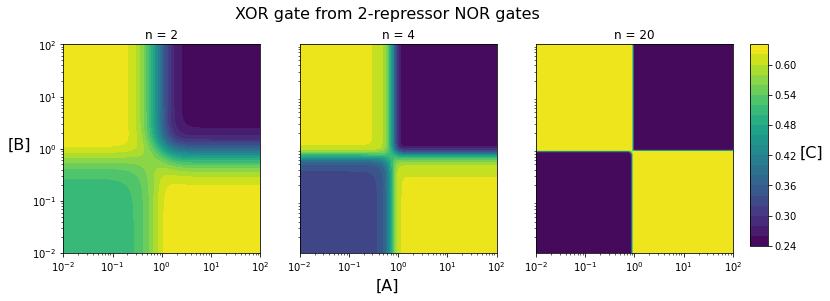

In [50]:
### DO NOT MODIFY THIS CELL ###

# meshgrid for plotting
x = np.logspace(-2, 2, 100)
x, y = np.meshgrid(x, x)

# Create 3 subplots for 3 values of n: 2, 4, and 20
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, n in enumerate([2, 4, 20]):
    ax[i].contourf(x, y, xor_gate(x, y, n), 20, cmap='viridis')
    ax[i].set_title('n = %d' % n)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')

### The following code is just to make the plots look nicer ###

# set title for overall figure
fig.suptitle('XOR gate from 2-repressor NOR gates\n',fontsize=16)
# add empty line between suptitle and subplot titles for spacing/presentation
fig.subplots_adjust(top=0.85)
# remove yticks from 2nd and 3rd subplots
ax[1].set_yticks([])
ax[2].set_yticks([])
# set ylabel for overall figure to [B]
fig.text(0.06, 0.5, '[B]', va='center', rotation='horizontal',fontsize=16)
# set xlabel for overall figure to [A]
fig.text(0.5, 0.01, '[A]', ha='center', va='center',fontsize=16)
# add colorbar to right of the figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(ax[0].contourf(x, y, xor_gate(x, y, 2), 20, cmap='viridis'), cax=cbar_ax)
# add colorbar label
cbar_ax.set_ylabel('[C]', rotation=0, labelpad=15, fontsize=16)

plt.show()

## 2.2

This looks nice in simulation, but in reality there are many practical challenges for creating a logic gate like this XOR-gate from compounded 2-repressor NOR-gates. **List and explain 2 reasons why a cascaded 5-gate system like this XOR-gate might not behave the same way in real life as in simulation.**

## 2.3 **(Grad Students Only)**

Notice that for both the n=2 and n=4 graphs, the bottom left quadrant is lighter colored than the upper right quadrant, indicating higher output concentration. However, both these quadrants correspond to "OFF" states of the XOR-gate. **In a few sentences explain why the lower left quadrant has a less digital "OFF" state than the upper right quadrant for lower values of n, including why this behavior is not observed in the n=20 graph.**

# Problem 3

In class you learned that the model for a bistable switch is given by the following equations :

\begin{align}
\dot{x} &= \frac{\alpha}{1+y^n} - x\\[1em]
\dot{y} &= \frac{\alpha}{1+x^n} - y,
\end{align}

Create the phase diagram for this system, i.e. generate a vector field showing the direction of
change of x and y. Also visualize the nullclines and equilibrium points on the same plot.
Which equilibrium points are stable, and which are unstable? 

You may use any tools at your
disposal for plotting the phase diagram (Python, Mathematica, Matlab etc.). We have provided partially completed Python code. Feel free to use or change anything in your implementation. Places where you will need to fill in code are marked as "TODO". 

Provide plots for n=1, n=2, and n=5. Use a=6.

In [75]:
import numpy as np
import scipy.integrate
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [76]:
# x, y: coordinates/concentrations
# a: constant
# n: hill coefficient
# returns the differentials of x and y
def my_bistable_switch(x, y, a, n):
    xdot = a / (1 + y ** 2) - x
    ydot = a / (1 + x ** 2) - y
    return xdot, ydot
    

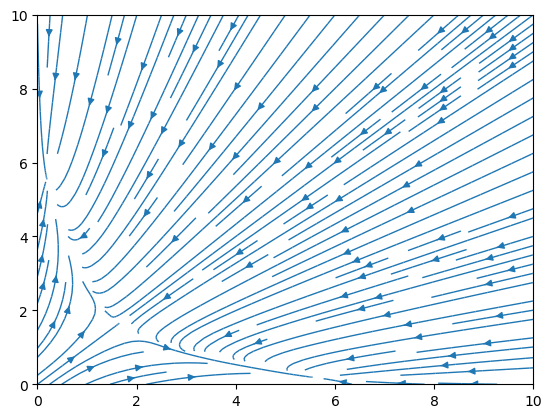

In [77]:
x = np.arange(0, 10.1, 0.5)
y = np.arange(0, 10.1, 0.5)
X,Y = np.meshgrid(x, y)

# making a meshgrid basically combines the x and y arrays into thing with all
# the combinations of points

a = 6
n = 1

xdot, ydot = my_bistable_switch(X, Y, a, n)

# plt.quiver(X, Y, xdot, ydot)
plt.streamplot(X, Y, xdot, ydot, linewidth=1, density=1.4)
plt.show()


In [46]:
# test cell for graphing ODEs

g, L = 1, 1
xvalues, yvalues = np.meshgrid(np.arange(-8, 8, 0.1), np.arange(-3, 3, 0.1))
xdot = yvalues
ydot = -g/L * np.sin(xvalues)
# plt.streamplot(xvalues, yvalues, xdot, ydot)
# plt.grid()
# plt.show()

In [ ]:
### MODIFY THIS CELL ###

# TODO: this fuction should return the equations for a bistable switch
# function arguments: 
# xy: tuple with equation variables x and y
# t: numpy array of evenly spaced time values
# a, n: function arguments that you will be changing 
# return type: numpy array

def bistable_switch(xy, a, n):
    x, y = xy
    
    
    
    

In [ ]:
### MODIFY THIS CELL ###

#Plots the flow field
    
# Parameters:
# f : function for form f(y, *args). Must return a 2-array.
# x_range : array_like, shape (2,). Range of values for x-axis.
# y_range : array_like, shape (2,). Range of values for y-axis.
# args : tuple, default ()
# Additional arguments to be passed to f:
# n_grid : int, default 100
# Number of grid points to use in computing derivatives on phase portrait.
# Returns derivatives and x,y space

def get_flow_field(bistable_switch, x_range, y_range, args=(), n_grid=100):

    # Set up u,v space
    x = np.linspace(x_range[0], x_range[1], n_grid)
    y = np.linspace(y_range[0], y_range[1], n_grid)
    xx, yy = np.meshgrid(x, y)

    # Compute derivatives and update numpy arrays u and v, where u[i,j] = dx[i,j]/dt and v[i,j] = dy[i,j]/dt
    u = np.empty_like(xx)
    v = np.empty_like(xx)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            # You fill in code here!
            # TODO: compute derivatives for all values acrosss u,v space 
            
    return u, v, x, y

In [ ]:
### MODIFY THIS CELL ###

def get_nullclines(x_range, y_range, a, n):
    
    # x-nullcline
    x_y = np.linspace(y_range[0], y_range[1], 200)
    x_x = # TODO: Fill in the equation to compute the x-nullcline over the x_y space given
    
    # y-nullcline
    y_x = np.linspace(x_range[0], x_range[1], 200)
    y_y = # TODO: Fill in the equation to compute the y-nullcline over the y_x space given
    
    return x_x, x_y, y_x, y_y

In [ ]:
### MODIFY THIS CELL ###

# Function returns numpy array equations needed to determine fixed points 
# xy: tuple with equation variables x and y
# return type: numpy array 

# This function is used to find fixed points
def get_eq_points(xy):
    # TODO: fill in function

In [ ]:
### MODIFY THIS CELL ###

# Parameters
# TODO: test dynamic system with different assignments of 'a' and 'n'
args = (a, n)

In [ ]:
### MODIFY THIS CELL ###

# TODO: 
# Call associated fucntion to get points for flow field and nullclines for plotting

In [ ]:
### MODIFY THIS CELL ###

# Find unstable fixed point
coeffs = np.zeros(n+2)
coeffs[0] = 1
coeffs[-2] = 1
coeffs[-1] = -a

r = np.roots(coeffs)
ind = np.where(np.logical_and(np.isreal(r), r.real >= 0))
fp1 = np.array([r[ind][0].real]*2)

# Find stable fixed points (fp0 and fp2)
# HINT: use scipy.optimize with get_eq_points function
# fixed points are where derivatives equal zero and nullclines intersect
# Good initialization conditions are [0,1]

x1,y1 = fp0
x2,y2 = fp1
x3,y3 = fp2

In [ ]:
### YOU MAY MODIFY THIS CELL BUT WILL NOT BE GRADED ###
# Nothing to do here! Plotting code already complete

# Configure plotting
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
ax.set_xlabel("x")
ax.set_ylabel("y")

# Plot flow field
ax.streamplot(x, y, u, v)

# Plot nullclines
ax.plot(x_x, x_y)
ax.plot(y_x, y_y)

# Plot fixed points
ax.plot(x1, y1, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
ax.plot(x2, y2, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
ax.plot(x3, y3, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
 
# show plot
plt.show()